<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/03_Data_Analysis_Oil_Consumption_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=red size=10><center>🛢️ Oil Consumption by Country 🛢️</center></font>
***

## <font color=red>1 Conhecendo os dados</font>
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.worldometers.info/oil/oil-consumption-by-country/

### <font color=red>1.1 Importando as bibliotecas</font>
***

In [2]:
!pip3 install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 1.3 MB 25.5 MB/s 
     |████████████████████████████████| 42 kB 704 kB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=d456b59ecd0ecb11395f885d7c7ba61d1c127daf7c34878c67fbd46da119f103
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [3]:
# Tratamento de dados
import pandas as pd
import numpy as np

# Análise Gráfica
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (18, 7.5))

# Tradutor
from googletrans import Translator

# Coordenadas Geográficas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Mapas
import folium
from folium import plugins

### <font color=red>1.2 Tratando os dados</font>
***

In [4]:
dados = pd.read_html('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Oil Consumption by Country - Worldometer.html')

In [5]:
dados = pd.DataFrame(dados[0])

Vamos analisar os dados do nosso DataFrame

In [6]:
print(f'Inicialmente temos {dados.shape[0]} linhas e {dados.shape[1]} colunas')

Inicialmente temos 214 linhas e 5 colunas


In [7]:
dados.head()

,#,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita
0,1,United States,19687287,20.3 %,934.3
1,2,China,12791553,13.2 %,138.7
2,3,India,4443000,4.6 %,51.4
3,4,Japan,4012877,4.1 %,481.5
4,5,Russia,3631287,3.7 %,383.2


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   #                                214 non-null    int64  
 1   Country                          214 non-null    object 
 2   Daily Oil Consumption (barrels)  214 non-null    int64  
 3   World Share                      214 non-null    object 
 4   Yearly Gallons Per Capita        214 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.5+ KB


#### <font color=red>1.2.1 Removendo colunas obsoletas</font>
***

A coluna '#' pode ser substituída pelo index para referenciar os países.

In [9]:
del dados['#']

In [10]:
dados.head()

,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita
0,United States,19687287,20.3 %,934.3
1,China,12791553,13.2 %,138.7
2,India,4443000,4.6 %,51.4
3,Japan,4012877,4.1 %,481.5
4,Russia,3631287,3.7 %,383.2


In [11]:
dados.index = [x + 1 for x in range(len(dados))]

In [12]:
dados.head()

,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita
1,United States,19687287,20.3 %,934.3
2,China,12791553,13.2 %,138.7
3,India,4443000,4.6 %,51.4
4,Japan,4012877,4.1 %,481.5
5,Russia,3631287,3.7 %,383.2


#### <font color=red>1.2.2 Levantamento das Coordenadas Geográficas com Geopy</font>
***

https://www.geeksforgeeks.org/how-to-find-longitude-and-latitude-for-a-list-of-regions-or-country-using-python/

In [13]:
longitude = []
latitude = []

In [14]:
def findGeocode(country):
  try:
    geolocator = Nominatim(user_agent="http")
    return geolocator.geocode(country)
  except GeocoderTimedOut:    
    return findGeocode(country)

In [15]:
for i in (dados['Country']):
    if findGeocode(i) != None:
        loc = findGeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [16]:
dados['Latitude'] = latitude
dados['Longitude'] = longitude
dados.head()

,Country,Daily Oil Consumption (barrels),World Share,Yearly Gallons Per Capita,Latitude,Longitude
1,United States,19687287,20.3 %,934.3,39.783730,-100.445882
2,China,12791553,13.2 %,138.7,35.000074,104.999927
3,India,4443000,4.6 %,51.4,22.351115,78.667743
4,Japan,4012877,4.1 %,481.5,36.574844,139.239418
5,Russia,3631287,3.7 %,383.2,64.686314,97.745306


#### <font color=red>1.2.3 Traduzindo os valores</font>
***

In [17]:
listacols = ['País', 'Consumo diário de petróleo (barril)', 'Proporção Mundial (%)', 
             'Consumo anual per capita (galão)', 'Latitude', 'Longitude']
dados.columns = listacols
dados.columns.name = 'Rank Mundial'

dados.head()

Rank Mundial,País,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (galão),Latitude,Longitude
1,United States,19687287,20.3 %,934.3,39.783730,-100.445882
2,China,12791553,13.2 %,138.7,35.000074,104.999927
3,India,4443000,4.6 %,51.4,22.351115,78.667743
4,Japan,4012877,4.1 %,481.5,36.574844,139.239418
5,Russia,3631287,3.7 %,383.2,64.686314,97.745306


In [18]:
# tradutor = Translator()

# def traduzir(value):
#   td = tradutor.translate(value, src='en', dest='pt')
#   return td.text

In [19]:
# dados['Países'] = [traduzir(i) for i in dados['País']]

In [20]:
dados['País'].unique()

array(['United States', 'China', 'India', 'Japan', 'Russia',
       'Saudi Arabia', 'Brazil', 'South Korea', 'Canada', 'Germany',
       'Mexico', 'Iran', 'France', 'Indonesia', 'United Kingdom',
       'Singapore', 'Thailand', 'Spain', 'Italy', 'Australia', 'Taiwan',
       'Turkey', 'Netherlands', 'United Arab Emirates', 'Egypt', 'Iraq',
       'Argentina', 'Malaysia', 'South Africa', 'Belgium', 'Venezuela',
       'Poland', 'Pakistan', 'Vietnam', 'Algeria', 'Philippines',
       'Nigeria', 'Hong Kong', 'Kuwait', 'Colombia', 'Chile',
       'Kazakhstan', 'Sweden', 'Greece', 'Morocco', 'Austria', 'Ecuador',
       'Peru', 'Ukraine', 'Portugal', 'Israel', 'Switzerland', 'Libya',
       'Finland', 'Norway', 'Romania', 'Oman', 'Czech Republic (Czechia)',
       'Qatar', 'New Zealand', 'Denmark', 'Hungary', 'Panama', 'Lebanon',
       'Cuba', 'Ireland', 'Turkmenistan', 'Syria', 'Sudan', 'Belarus',
       'Dominican Republic', 'Angola', 'Sri Lanka', 'Myanmar', 'Jordan',
       'Kenya', 'Ba

In [21]:
dados['Traduzido'] = ['Estados Unidos', 'China', 'Índia', 'Japão', 'Rússia',
       'Arábia Saudita', 'Brasil', 'Coreia do Sul', 'Canadá', 'Alemanha',
       'México', 'Irã', 'França', 'Indonésia', 'Reino Unido',
       'Singapura', 'Tailândia', 'Espanha', 'Itália', 'Austrália', 'Taiwan',
       'Turquia', 'Holanda', 'Emirados Árabes Unidos', 'Egito', 'Iraque',
       'Argentina', 'Malásia', 'África do Sul', 'Bélgica', 'Venezuela',
       'Polônia', 'Paquistão', 'Vietnã', 'Argélia', 'Filipinas',
       'Nigéria', 'Hong Kong', 'Kuwait', 'Colômbia', 'Chile',
       'Cazaquistão', 'Suécia', 'Grécia', 'Marrocos', 'Áustria', 'Equador',
       'Peru', 'Ucrânia', 'Portugal', 'Israel', 'Suíça', 'Líbia',
       'Finlândia', 'Noruega', 'Romênia', 'Omã', 'República Tcheca (Tcheca)',
       'Catar', 'Nova Zelândia', 'Dinamarca', 'Hungria', 'Panamá', 'Líbano',
       'Cuba', 'Irlanda', 'Turquemenistão', 'Síria', 'Sudão', 'Bielorrússia',
       'República Dominicana', 'Angola', 'Sri Lanka', 'Myanmar', 'Jordânia',
       'Quênia', 'Bangladesh', 'Bulgária', 'Tunísia', 'Porto Rico',
       'Azerbaijão', 'Guatemala', 'Bolívia', 'Gana', 'Eslováquia',
       'Gibraltar', 'Sérvia', 'Etiópia', 'Tanzânia', 'Croácia',
       'Bahrein', 'Lituânia', 'Iêmen', 'Honduras', 'Trinidad e Tobago', 
       'Luxemburgo', 'Costa Rica', 'Jamaica', 'Uruguai', 'Eslovênia',
       'Chipre', 'El Salvador', 'Paraguai', "Côte d'Ivoire", 'Senegal',
       'Uzbequistão', 'Camboja', 'Malta', 'Nepal', 'Quirguistão',
       'Camarões', 'Moçambique', 'Letônia', 'Papua Nova Guiné',
       'Nicarágua', 'Benin', 'Bósnia e Herzegovina', 'Afeganistão',
       'Geórgia', 'Uganda', 'Estônia', 'Maurícia', 'Albânia', 'Namíbia',
       'Estado da Palestina', 'Zimbabwe', 'Haiti', 'Burkina Faso',
       'Zâmbia', 'Mali', 'Gabão', 'Macedônia do Norte', 'Botsuana',
       'Mongólia', 'Tajiquistão', 'RD Congo', 'Bahamas', 'Nova Caledônia',
       'Islândia', 'Guiné', 'Moldávia', 'Laos', 'Madagáscar',
       'Coreia do Norte', 'Reunião', 'Macau', 'Mauritânia', 'Congo',
       'Martinica', 'EUA Ilhas Virgens', 'Brunei', 'Fiji', 'Togo',
       'Guiana', 'Guadalupe', 'Suriname', 'Guam', 'Níger', 'Barbados',
       'Maldivas', 'Sudão do Sul', 'Aruba', 'Libéria', 'Seychelles',
       'Montenegro', 'Ruanda', 'Polinésia Francesa', 'Serra Leoa',
       'Djibuti', 'Malawi', 'Armênia', 'Cabo Verde', 'Somália',
       'Eswatini', 'Guiné Equatorial', 'Antígua e Barbuda', 'Lesoto',
       'Bermudas', 'Guiana Francesa', 'Ilhas Faroé', 'Ilhas Caimão',
       'Belize', 'Gronelândia', 'Gâmbia', 'Timor-Leste', 'Santa Lúcia',
       'Butão', 'Eritreia', 'República Centro-Africana', 'Guiné-Bissau',
       'Samoa', 'Samoa Americana', 'Chad', 'Granada', 'Saara Ocidental',
       'São Cristóvão e Nevis', 'S. Vicente e Granadinas',
       'Ilhas Salomão', 'Burundi', 'Turks e Caicos', 'Dominica',
       'Comores', 'Ilhas Virgens Britânicas', 'Vanuatu',
       'São Tomé e Príncipe', 'Tonga', 'São Pedro e Miquelon',
       'Ilhas Cook', 'Nauru', 'Montserrat', 'Kiribati',
       'Ilhas Malvinas', 'Santa Helena', 'Niue']

In [22]:
dados['País'] = dados['Traduzido']

In [23]:
del dados['Traduzido']

In [24]:
dados.head()

Rank Mundial,País,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (galão),Latitude,Longitude
1,Estados Unidos,19687287,20.3 %,934.3,39.783730,-100.445882
2,China,12791553,13.2 %,138.7,35.000074,104.999927
3,Índia,4443000,4.6 %,51.4,22.351115,78.667743
4,Japão,4012877,4.1 %,481.5,36.574844,139.239418
5,Rússia,3631287,3.7 %,383.2,64.686314,97.745306


#### <font color=red>1.2.4 Tratando a tipagem</font>
***

Vamos ajustar os valores da coluna Proporção Mundial (%) para trabalhar com maior flexibilidade matemática.

In [25]:
dados['Proporção Mundial (%)'] = dados['Proporção Mundial (%)'].replace({'%': ''}, regex=True)

dados.head()

Rank Mundial,País,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (galão),Latitude,Longitude
1,Estados Unidos,19687287,20.3,934.3,39.783730,-100.445882
2,China,12791553,13.2,138.7,35.000074,104.999927
3,Índia,4443000,4.6,51.4,22.351115,78.667743
4,Japão,4012877,4.1,481.5,36.574844,139.239418
5,Rússia,3631287,3.7,383.2,64.686314,97.745306


Agora podemos converter os valores de dados['Proporção Mundial (%)'] para o tipo float.

In [26]:
dados['Proporção Mundial (%)'] = dados['Proporção Mundial (%)'].astype(float)

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   País                                 214 non-null    object 
 1   Consumo diário de petróleo (barril)  214 non-null    int64  
 2   Proporção Mundial (%)                214 non-null    float64
 3   Consumo anual per capita (galão)     214 non-null    float64
 4   Latitude                             214 non-null    float64
 5   Longitude                            214 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.7+ KB


#### <font color=red>1.2.5 Conversão dos valores de consumo anual per capita de galões para barris</font>
***

Sabendo que 1 galão americano equivale à 0,0238095 barril.

In [28]:
dados['Consumo anual per capita (barril)'] = round((dados['Consumo anual per capita (galão)'] * 0.0238095), 1)

In [29]:
dados.head()

Rank Mundial,País,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (galão),Latitude,Longitude,Consumo anual per capita (barril)
1,Estados Unidos,19687287,20.3,934.3,39.783730,-100.445882,22.2
2,China,12791553,13.2,138.7,35.000074,104.999927,3.3
3,Índia,4443000,4.6,51.4,22.351115,78.667743,1.2
4,Japão,4012877,4.1,481.5,36.574844,139.239418,11.5
5,Rússia,3631287,3.7,383.2,64.686314,97.745306,9.1


In [30]:
del dados['Consumo anual per capita (galão)']

In [31]:
dados.head()

Rank Mundial,País,Consumo diário de petróleo (barril),Proporção Mundial (%),Latitude,Longitude,Consumo anual per capita (barril)
1,Estados Unidos,19687287,20.3,39.783730,-100.445882,22.2
2,China,12791553,13.2,35.000074,104.999927,3.3
3,Índia,4443000,4.6,22.351115,78.667743,1.2
4,Japão,4012877,4.1,36.574844,139.239418,11.5
5,Rússia,3631287,3.7,64.686314,97.745306,9.1


#### <font color=red>1.2.6 Organizando a ordem das colunas</font>

In [32]:
dados = dados[['País', 'Latitude', 'Longitude', 'Consumo diário de petróleo (barril)', 'Proporção Mundial (%)', 
             'Consumo anual per capita (barril)']]

In [33]:
dados.head()

Rank Mundial,País,Latitude,Longitude,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (barril)
1,Estados Unidos,39.783730,-100.445882,19687287,20.3,22.2
2,China,35.000074,104.999927,12791553,13.2,3.3
3,Índia,22.351115,78.667743,4443000,4.6,1.2
4,Japão,36.574844,139.239418,4012877,4.1,11.5
5,Rússia,64.686314,97.745306,3631287,3.7,9.1


#### <font color=red>1.2.7 Exportando dados tratados</font>

In [49]:
dados.to_html('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Análise de Dados/Datasets/Oil_Consumption_by_country_final.html')

## <font color=red>2 Análise Gráfica</font>
***

### <font color=red>2.1 Consumo diário de petróleo</font>
***

Vamos visualizar quais são os países que mais consomem petróleo diariamente.

In [94]:
font = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 18,
        }

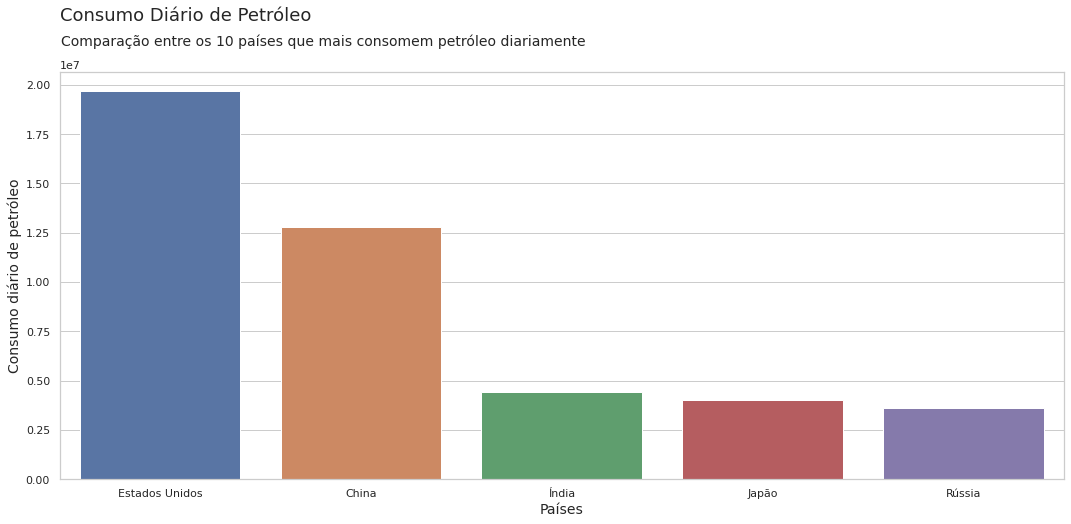

In [249]:
ax = sns.barplot(x = dados['País'][:5], y = dados['Consumo diário de petróleo (barril)'], data = dados)
plt.suptitle('Consumo Diário de Petróleo', x = 0.222, y = 1, fontsize = 18)
plt.title('Comparação entre os 10 países que mais consomem petróleo diariamente', x = 0.263, y = 1.05, fontsize = 14)
ax.set_xlabel('Países', fontsize = 14)
ax.set_ylabel('Consumo diário de petróleo', fontsize = 14)
ax = ax

#### <font color=red>2.1.1 Análise Geográfica do consumo diário de petróleo</font>
***

Criando o mapa base

In [258]:
mapa = 'mapa'

In [259]:
coordenadas = []

for lat, lng in zip(dados['Latitude'], dados['Longitude']):
  coordenadas.append((lat, lng))

In [260]:
mapa = folium.Map(location=coordenadas[6], zoom_start=3, tiles='cartodbdark_matter', control_scale= True)

Adicionando os plugins

In [261]:
#Add Plugins
#add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(mapa)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(mapa)
folium.raster_layers.TileLayer('Stamen Toner').add_to(mapa)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(mapa)

In [262]:
# add layer control to show different maps
folium.LayerControl().add_to(mapa)

In [263]:
# creating a minimap
minimap = plugins.MiniMap(toggle_display=True)

In [264]:
# add minimap to map
mapa = mapa.add_child(minimap)

In [265]:
# add full screen button to map
plugins.Fullscreen(position='topright').add_to(mapa)
draw = plugins.Draw(export=True)

In [266]:
# add draw tools to map (.1 * index + .2)
draw.add_to(mapa)

In [267]:
def cor_top_5(valor):
  for i in valor:
    if i <= 5:
      return 'red'
    else:
      return 'blue'

In [268]:
for lat, lng, index, consumo in zip(dados['Latitude'], dados['Longitude'], dados.index, dados['Consumo diário de petróleo (barril)']):
  folium.CircleMarker(
      [lat, lng], 
      radius = ((30 * (np.e ** (-index / 3))) + 5),
      popup = '<b>Consumo: </b>' + str(consumo) + '<br>', 
      fill = True, 
      color='r', 
      fill_color = 'blue', 
      fill_opacity=0.7).add_to(mapa)

# display map
mapa

### <font color=red>2.2 Consumo anual per capita (em barris)</font>
***

In [45]:
rank_per_capita = dados.sort_values(by='Consumo anual per capita (barril)', ascending=False)
rank_per_capita.index = [x + 1 for x in range(len(rank_per_capita))]
rank_per_capita.head()

Rank Mundial,País,Latitude,Longitude,Consumo diário de petróleo (barril),Proporção Mundial (%),Consumo anual per capita (barril)
1,Gibraltar,36.140807,-5.354129,75000,0.07700,811.4
2,Singapura,1.357107,103.819499,1357000,1.40000,87.6
3,EUA Ilhas Virgens,17.789187,-64.708057,16440,0.01700,57.2
4,São Pedro e Miquelon,46.777550,-56.176867,660,0.00068,40.6
5,Malta,35.888599,14.447691,47000,0.04800,39.3


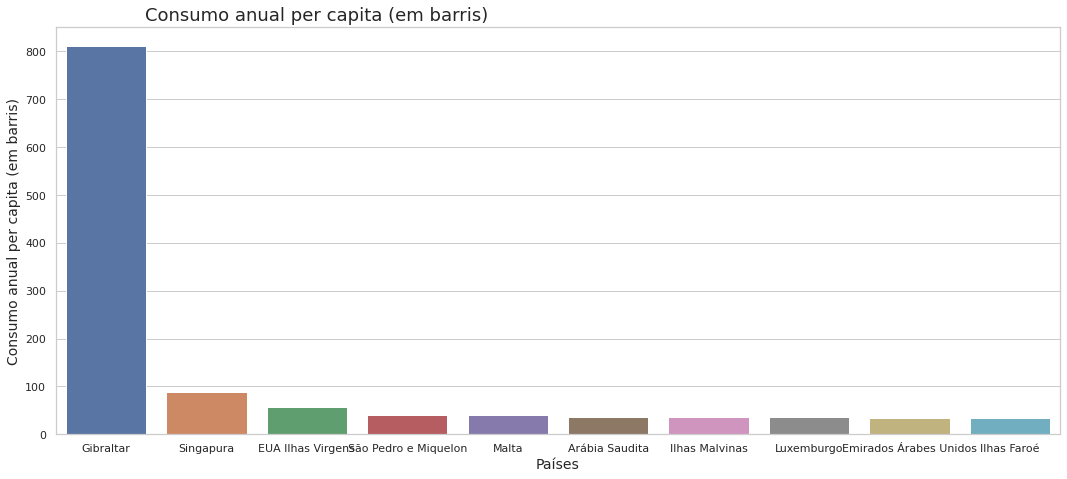

In [46]:
ax = sns.barplot(x = rank_per_capita['País'][:10], y = rank_per_capita['Consumo anual per capita (barril)'], data = dados)
ax.set_title('Consumo anual per capita (em barris)', fontsize = 18, x = .26, y = 1)
ax.set_xlabel('Países', fontsize = 14)
ax.set_ylabel('Consumo anual per capita (em barris)', fontsize = 14)
ax = ax